# Outliers detection

**What is an outlier**

An Outlier is a data item that deviates significantly from the rest of the (so-called normal) objects. Identifying outliers is important in statistics and data analysis because they can have a significant impact on the results of statistical analyses.

Outliers can modify the mean (average) and affect measures of central tendency, as well as influence the results of tests of statistical significance.

**How Ouliers are caused?**
- Measurement errors: Errors in data collection or measurement.
- Natural variability: Inherent variability in certain phenomena.
- Data entry errors: Human errors during data entry.
- Experimental errors: In experimental settings, anomalies may occur due to uncontrolled factors, equipment malfunctions, or unexpected events.
- ...

**How to identify an outlier**

There are many ways to identify outliers:
- Z-Score: also called 'standar scores'. Zscore is a measure that indicates how far is the data from the mean.
- **IQR** (Inter Quartile Range): the outlier base values are defined based on 1.5*IQR 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# We load a dataset with example data: length of rivers, in miles
# Cargamos un conjunto de datos con datos de ejemplo: longitud de los ríos, en millas
rios = pd.read_csv('../datasets/rios.csv',index_col=0)
rios

,Millas
Rio,
1,735
2,320
3,325
4,392
5,524
...,...
137,720
138,270
139,430


/home/xuwira30/miniconda3/envs/sistemas/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/xuwira30/miniconda3/envs/sistemas/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


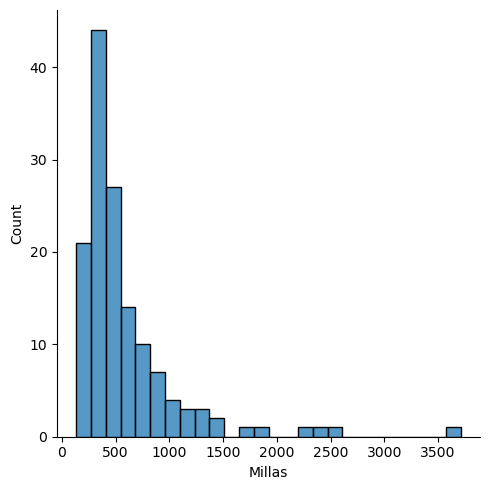

In [3]:
# We show the distribution of the data with a histogram
# Mostramos la distribución de los datos con un histograma
sns.displot(data=rios,x='Millas')

In [13]:
# We show the data distribution with a boxplot.
# The "whiskers" indicate the percentages
# The points that are left out... are outliers?

/home/xuwira30/miniconda3/envs/sistemas/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Millas'>

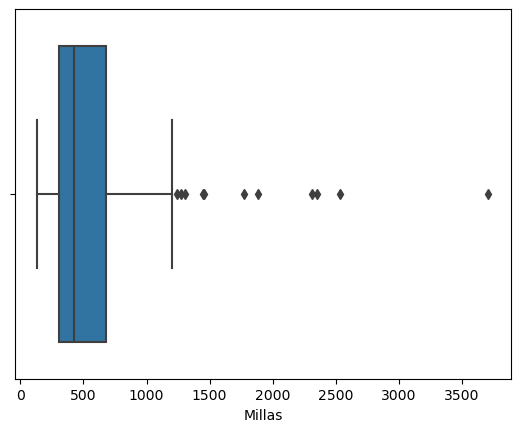

In [12]:
# Mostramos la distribución de los datos con un boxplot.
# Los "bigotes" indican los porcentajes
# Los puntos que quedan fuera... ¿son valores atípicos?
sns.boxplot(data=rios,x='Millas')

In [5]:
# Show statistics
# Mostrar estadísticas
rios.describe()

,Millas
count,141.000000
mean,591.184397
std,493.870842
min,135.000000
25%,310.000000
50%,425.000000
75%,680.000000
max,3710.000000


In [6]:
Q1 = rios.Millas.quantile(0.25)
Q3 = rios.Millas.quantile(0.75)
IQR = Q3 - Q1
mediana = rios.Millas.median()
minimo = rios.Millas.min()
maximo = rios.Millas.max()

print(f'minimo: {minimo}')
print(f'Q1: {Q1}')
print(f'mediana: {mediana}')
print(f'Q3: {Q3}')
print(f'máximo: {maximo}')
print(f'Rango intercuartílico: {IQR}')

minimo: 135
Q1: 310.0
mediana: 425.0
Q3: 680.0
máximo: 3710
Rango intercuartílico: 370.0


In [ ]:
# Calculate the "whiskers"
# Calcula los "bigotes"

In [7]:
BI = (Q1 - 1.5 * IQR)
BS = (Q3 + 1.5 * IQR)

print(f'Bigote Inferior: {BI}')
print(f'Bigote Superior: {BS}')

Bigote Inferior: -245.0
Bigote Superior: 1235.0


In [ ]:
# The values of the whiskers are limited to the reach of the minimum and maximum values, which cannot be exceeded
# Los valores de los bigotes se limitan al alcance de los valores mínimo y máximo, que no pueden superarse

In [8]:
# The outliers will be the values that are outside the interval that define the whiskers
# Los valores atípicos serán los valores que están fuera del intervalo que definen los bigotes
outliers = rios[(rios.Millas < BI) | (rios.Millas > BS)].sort_values('Millas')
outliers

,Millas
Rio,
25,1243
98,1270
83,1306
23,1450
7,1459
141,1770
101,1885
69,2315
66,2348


In [9]:
# We create a new Dataframe without outliers
# Creamos un nuevo Dataframe sin valores atípicos
rios_sen_outliers = rios[(rios.Millas >= BI) & (rios.Millas <= BS)].sort_values('Millas')
rios_sen_outliers

,Millas
Rio,
8,135
17,202
108,210
39,210
129,215
...,...
121,1038
89,1054
114,1100


/home/xuwira30/miniconda3/envs/sistemas/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Millas'>

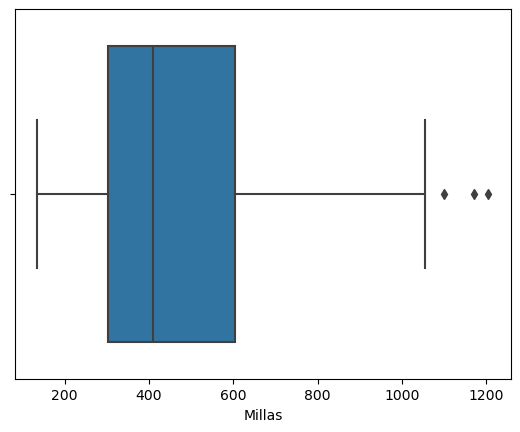

In [10]:
# We draw a new boxplot
# Dibujamos un nuevo boxplot
sns.boxplot(data=rios_sen_outliers,x='Millas')

In [ ]:
# We could repeat the process until the outliers disappear completely
# Podemos repetir el proceso hasta que los valores atípicos desaparezcan por completo

/home/xuwira30/miniconda3/envs/sistemas/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Millas'>

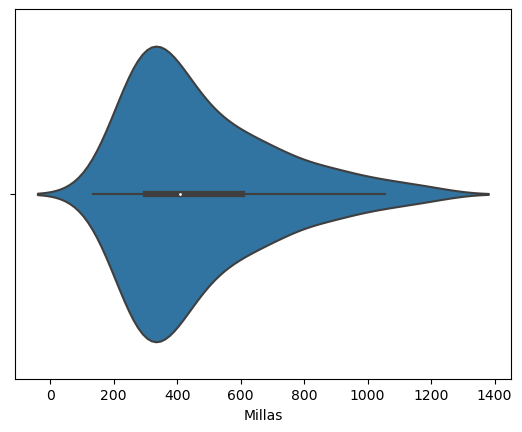

In [11]:
sns.violinplot(data=rios_sen_outliers,x='Millas')